<a href="https://colab.research.google.com/github/rayhannkabirr/Weather_Rayhan_Kabir/blob/main/starter_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🌦️ WeatherWise – Starter Notebook

Welcome to your **WeatherWise** project notebook! This scaffold is designed to help you build your weather advisor app using Python, visualisations, and AI-enhanced development.

---

📄 **Full Assignment Specification**  
See [`ASSIGNMENT.md`](ASSIGNMENT.md) or check the LMS for full details.

📝 **Quick Refresher**  
A one-page summary is available in [`resources/assignment-summary.md`](resources/assignment-summary.md).

---

🧠 **This Notebook Structure is Optional**  
You’re encouraged to reorganise, rename sections, or remove scaffold cells if you prefer — as long as your final version meets the requirements.

✅ You may delete this note before submission.



## 🧰 Setup and Imports

This section imports commonly used packages and installs any additional tools used in the project.

- You may not need all of these unless you're using specific features (e.g. visualisations, advanced prompting).
- The notebook assumes the following packages are **pre-installed** in the provided environment or installable via pip:
  - `requests`, `matplotlib`, `pyinputplus`
  - `fetch-my-weather` (for accessing weather data easily)
  - `hands-on-ai` (for AI logging, comparisons, or prompting tools)

If you're running this notebook in **Google Colab**, uncomment the following lines to install the required packages.


In [1]:
# 🧪 Optional packages — uncomment if needed in Colab or JupyterHub
!pip install fetch-my-weather
!pip install hands-on-ai
!pip install pyinputplus

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.7/143.7 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.5/155.5 kB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.1/24.1 MB 65.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.0/253.0 kB 16.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.0/71.0 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 352.0/352.0 kB 18.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.5/80.5 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 517.7/517.7 kB 32.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 70.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 452.2/452.2 kB 22.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 73.6 MB/s eta 0:00:00
  Attempting uninstall: jiter
    Found existing

In [4]:
import os

os.environ['HANDS_ON_AI_SERVER'] = 'http://ollama.serveur.au'
os.environ['HANDS_ON_AI_MODEL'] = 'granite3.2'
os.environ['HANDS_ON_AI_API_KEY'] = input('Enter your API key: ')

Enter your API key: 344a4b4792eb41adb8babdfc91b5fd36.qr4HbcKRga8kZWrSaBkynkPb


## 📦 Setup and Configuration
Import required packages and setup environment.

In [3]:
import requests
import matplotlib.pyplot as plt
import pyinputplus as pyip
# ✅ Import after installing (if needed)
from fetch_my_weather import get_weather
from hands_on_ai.chat import get_response

# Add any other setup code here

## 🌤️ Weather Data Functions

In [11]:
import requests
from datetime import datetime, timezone
from collections import defaultdict

API_KEY = "30479535113c5a5a36f4d04f191333ce"

def get_weather_data(location, forecast_days=5):
    """Fetch and process weather data for a given location using OpenWeatherMap."""
    forecast_days = max(1, min(forecast_days, 5))  # Clamp between 1 and 5 days

    # --- Step 1: Get location coordinates ---
    try:
        geo_url = f"http://api.openweathermap.org/geo/1.0/direct?q={location}&limit=1&appid={API_KEY}"
        geo_response = requests.get(geo_url, timeout=10)
        geo_response.raise_for_status()
        geo_data = geo_response.json()
    except Exception as e:
        print(f"[Error] Failed to fetch coordinates for '{location}': {e}")
        return None

    if not geo_data:
        print(f"[Warning] Location '{location}' not found.")
        return None

    lat, lon = geo_data[0]["lat"], geo_data[0]["lon"]

    # --- Step 2: Fetch current weather ---
    try:
        current_url = f"https://api.openweathermap.org/data/2.5/weather?lat={lat}&lon={lon}&units=metric&appid={API_KEY}"
        current_response = requests.get(current_url, timeout=10)
        current_response.raise_for_status()
        current_data = current_response.json()
    except Exception as e:
        print(f"[Error] Failed to fetch current weather: {e}")
        current_data = {}

    # --- Step 3: Fetch 5-day/3-hour forecast ---
    try:
        forecast_url = f"https://api.openweathermap.org/data/2.5/forecast?lat={lat}&lon={lon}&units=metric&appid={API_KEY}"
        forecast_response = requests.get(forecast_url, timeout=10)
        forecast_response.raise_for_status()
        forecast_data = forecast_response.json()
    except Exception as e:
        print(f"[Error] Failed to fetch forecast data: {e}")
        forecast_data = {}

    if "list" not in forecast_data:
        print("[Warning] No forecast data available.")
        return None

    # --- Step 4: Aggregate forecast by date ---
    daily_data = defaultdict(list)
    for entry in forecast_data["list"]:
        date = datetime.fromtimestamp(entry["dt"], tz=timezone.utc).strftime("%Y-%m-%d")
        daily_data[date].append(entry)

    # --- Step 5: Create summary for each day ---
    forecast_summary = []
    for date, entries in sorted(daily_data.items()):
        if len(forecast_summary) >= forecast_days:
            break

        temps = [e["main"]["temp"] for e in entries]
        weather_desc = entries[0]["weather"][0]["description"].capitalize()
        precip_total = sum(e.get("rain", {}).get("3h", 0) for e in entries)
        rain_prob = round(sum(e.get("pop", 0) for e in entries) / len(entries) * 100, 1)

        forecast_summary.append({
            "date": date,
            "maxtempC": round(max(temps), 1),
            "mintempC": round(min(temps), 1),
            "avgtempC": round(sum(temps) / len(temps), 1),
            "weatherDesc": weather_desc,
            "precipMM": round(precip_total, 2),
            "chanceofrain": rain_prob
        })

    # --- Step 6: Construct final data structure ---
    result = {
        "location": location,
        "current": {
            "temp_C": round(current_data.get("main", {}).get("temp", 0), 1),
            "weatherDesc": current_data.get("weather", [{}])[0].get("description", "N/A").capitalize(),
            "humidity": current_data.get("main", {}).get("humidity", "N/A"),
            "FeelsLikeC": round(current_data.get("main", {}).get("feels_like", 0), 1),
            "windspeedKmph": round(current_data.get("wind", {}).get("speed", 0) * 3.6, 1)  # convert m/s to km/h
        },
        "forecast": forecast_summary
    }

    return result


## 📊 Visualisation Functions

In [5]:
import matplotlib.pyplot as plt
import pandas as pd

def create_temperature_visualisation(weather_data, date_range=None, output_type='display'):

    if not weather_data or "forecast" not in weather_data:
        print("No forecast data available.")
        return None

    forecast = weather_data["forecast"]

    # Convert forecast list to DataFrame for easy filtering
    df = pd.DataFrame(forecast)

    # Ensure temperatures are numeric
    for col in ["maxtempC", "mintempC", "avgtempC"]:
        df[col] = pd.to_numeric(df[col], errors="coerce")

    # Filter by date range if provided
    if date_range:
        start_date, end_date = pd.to_datetime(date_range[0]), pd.to_datetime(date_range[1])
        df["date"] = pd.to_datetime(df["date"])
        df = df[(df["date"] >= start_date) & (df["date"] <= end_date)]

    if df.empty:
        print("No data found for the given date range.")
        return None

    # Create figure
    fig, ax = plt.subplots(figsize=(10, 6))

    # Plot with dotted lines and circle markers
    ax.plot(df["date"], df["maxtempC"], marker="o", linestyle=":", label="Max Temp (°C)", color="red")
    ax.plot(df["date"], df["mintempC"], marker="o", linestyle=":", label="Min Temp (°C)", color="blue")
    ax.plot(df["date"], df["avgtempC"], marker="o", linestyle=":", label="Avg Temp (°C)", color="green")

    # Formatting
    ax.set_title(f"Temperature Forecast for {weather_data['location']}")
    ax.set_xlabel("Date")
    ax.set_ylabel("Temperature (°C)")
    ax.legend()
    ax.grid(True, linestyle="--", alpha=0.6)
    plt.xticks(rotation=45)

    # Return or display
    if output_type == 'figure':
        return fig
    else:
        plt.show()
        return None


In [6]:
import matplotlib.pyplot as plt
import pandas as pd

def create_precipitation_visualisation(weather_data, output_type='display'):

    if not weather_data or "forecast" not in weather_data:
        print("No forecast data available.")
        return None

    forecast = weather_data["forecast"]
    rows = []

    # Collect precipitation data
    for day in forecast:
        date = day.get("date")
        hourly = day.get("hourly", [])
        df_hourly = pd.DataFrame(hourly)

        if not df_hourly.empty:
            df_hourly["precipMM"] = pd.to_numeric(df_hourly.get("precipMM"), errors="coerce").fillna(0)
            df_hourly["chanceofrain"] = pd.to_numeric(df_hourly.get("chanceofrain"), errors="coerce").fillna(0)

            daily_precip = df_hourly["precipMM"].sum()
            avg_chance = df_hourly["chanceofrain"].mean()
        else:
            daily_precip, avg_chance = 0, 0

        rows.append({"date": date, "precipMM": daily_precip, "chanceofrain": avg_chance})

    df = pd.DataFrame(rows)

    if df.empty:
        print("No precipitation data available.")
        return None

    # Line graph
    fig, ax1 = plt.subplots(figsize=(12, 7))

    # Precipitation line
    ax1.plot(df["date"], df["precipMM"], marker='o', linestyle='--', color='blue', label="Precipitation (mm)")
    ax1.set_xlabel("Date")
    ax1.set_ylabel("Precipitation (mm)", color='blue')
    ax1.tick_params(axis='y', labelcolor='blue')

    # Chance of rain line on secondary axis
    ax2 = ax1.twinx()
    ax2.plot(df["date"], df["chanceofrain"], marker='s', linestyle='-.', color='green', label="Chance of Rain (%)")
    ax2.set_ylabel("Chance of Rain (%)", color='green')
    ax2.tick_params(axis='y', labelcolor='green')

    # Titles, grid, legend
    ax1.grid(True, linestyle=":", alpha=0.7)
    plt.title(f"☔ Precipitation & Rain Chance Forecast for {weather_data['location']}")
    fig.autofmt_xdate(rotation=30)

    ax1.legend(loc="upper left")
    ax2.legend(loc="upper right")

    plt.subplots_adjust(bottom=0.2, top=0.9)

    if output_type == 'figure':
        return fig
    else:
        plt.show()
        return None


## 🤖 Natural Language Processing

In [7]:
import re

def parse_weather_question(question):
    result = {
        "location": None,
        "time_period": "today",
        "attribute": "general"
    }

    # --- Extract location ---
    # Stops before time words like today/tomorrow/next
    match = re.search(
        r'\b(?:in|of)\s+([a-zA-Z\s]+?)(?=\s+(?:today|tomorrow|next|for|this|$))',
        question,
        re.IGNORECASE
    )
    if match:
        result["location"] = match.group(1).strip().title()
    else:
        # fallback: find capitalized word (last one often city)
        match = re.findall(r'\b([A-Z][a-z]+)\b', question)
        if match:
            result["location"] = match[-1]

    q_lower = question.lower()

    # --- Extract time period ---
    if "tomorrow" in q_lower:
        result["time_period"] = "tomorrow"
    elif "today" in q_lower:
        result["time_period"] = "today"
    elif m := re.search(r'\bnext\s+(\d+)\s+days?\b', q_lower):
        result["time_period"] = f"next_{m.group(1)}_days"

    # --- Extract weather attribute ---
    if "temperature" in q_lower or "hot" in q_lower or "cold" in q_lower:
        result["attribute"] = "temperature"
    elif "rain" in q_lower or "precipitation" in q_lower:
        result["attribute"] = "precipitation"
    elif "forecast" in q_lower or "weather" in q_lower:
        result["attribute"] = "forecast"

    return result


## 🧭 User Interface

In [ ]:
# Define menu functions using pyinputplus or ipywidgets here

## 🧩 Main Application Logic

In [8]:
def generate_weather_response(parsed_question, weather_data):
    """Generate a formatted weather report with validated inputs and charts."""

    print(parsed_question.get('location'))
    # --- Step 1: Validate weather data ---
    if not weather_data or "forecast" not in weather_data:
        return "Sorry, I couldn't retrieve weather data at this time."

    # --- Step 2: Extract data safely ---
    location = parsed_question.get("location") or weather_data.get("location") or "your area"
    time_period = parsed_question.get("time_period", "today").lower()
    attribute = parsed_question.get("attribute", "general").lower()

    # --- Step 3: Validate extracted values ---
    valid_periods = ["today", "tomorrow"] + [f"next_{i}" for i in range(2, 8)]
    valid_attributes = ["temperature", "precipitation", "general"]

    if time_period not in valid_periods:
        time_period = "today"
    if attribute not in valid_attributes:
        attribute = "general"

    # --- Step 4: Helper to get specific day forecast safely ---
    def get_day_forecast(index):
        try:
            return weather_data["forecast"][index]
        except (KeyError, IndexError):
            return None

    # --- Step 5: Optional visualization ---
    try:
        create_temperature_visualisation(weather_data)
        create_precipitation_visualisation(weather_data)
    except Exception as e:
        print(f"[Warning] Visualization skipped due to error: {e}")

    # --- NEW: Helper to format a single day's forecast ---
    def format_single_day_response(day_data, label, location, attribute):
        if not day_data:
            return f"Sorry, I don't have {label.lower()}'s forecast for {location}."

        if attribute == "temperature":
            return f"🌡 {label} in {location}: {day_data['mintempC']}°C – {day_data['maxtempC']}°C."
        elif attribute == "precipitation":
            return f"🌧 {label} in {location}: {day_data.get('precipMM', '0')} mm precipitation expected."
        else:
            return (
                f"📅 {label} in {location}: "
                f"Temperature {day_data['mintempC']}°C–{day_data['maxtempC']}°C, "
                f"Precipitation {day_data.get('precipMM', '0')} mm."
            )

    # --- Step 6: Build response based on time period ---
    if time_period == "today":
        day = get_day_forecast(0)
        return format_single_day_response(day, "Today", location, attribute)

    elif time_period == "tomorrow":
        day = get_day_forecast(1)
        return format_single_day_response(day, "Tomorrow", location, attribute)

    elif time_period.startswith("next_"):
        try:
            days = int(time_period.split("_")[1])
        except ValueError:
            days = 3
        forecast_list = weather_data.get("forecast", [])[:days]
        if not forecast_list:
            return f"Sorry, I don't have forecast data for the next {days} days in {location}."

        lines = [f"📅 Weather forecast for the next {days} days in {location}:"]
        for day in forecast_list:
            lines.append(
                f"🗓 {day['date']}: Temp {day['mintempC']}°C–{day['maxtempC']}°C, "
                f"Precip {day.get('precipMM', '0')} mm"
            )
        return "\n".join(lines)

    else:
        return "Sorry, I couldn't understand the time period requested."


## 🧪 Testing and Examples

🌤️ Weather Assistant
Ask me about the weather (e.g., 'What will the temperature be in Paris tomorrow?'):
> what will the temparature be in perth today?
Perth


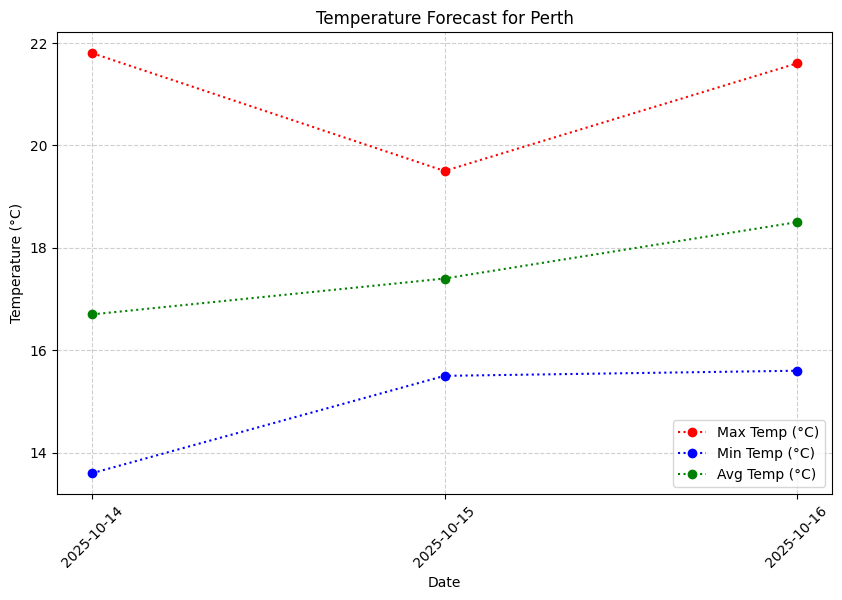

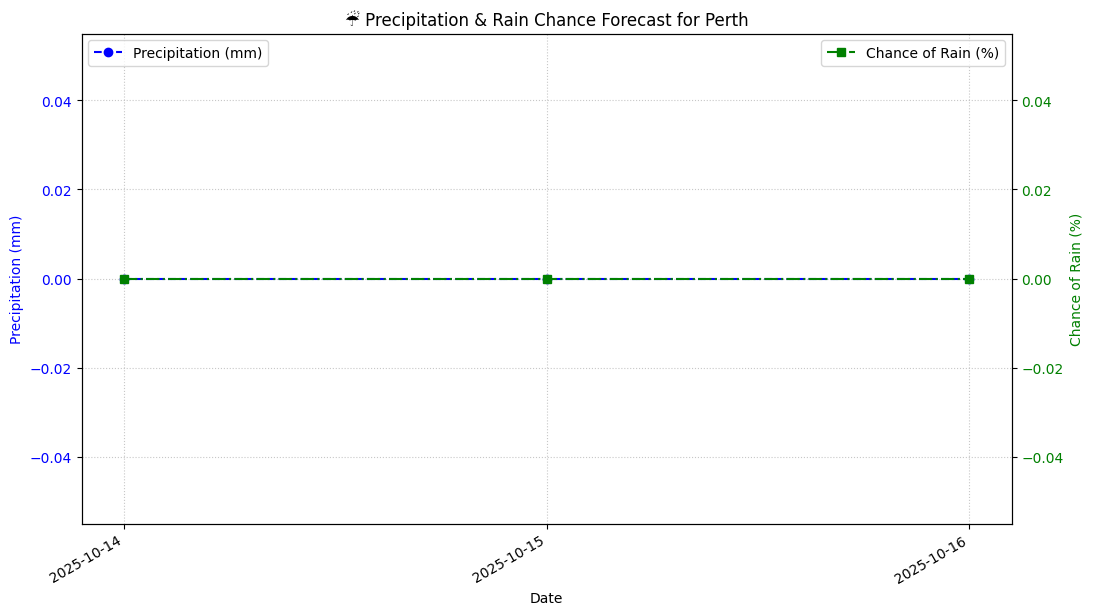


👉 📅 Today in Perth: Temperature 13.6°C–21.8°C, Precipitation 0 mm.


In [12]:
# Include sample input/output for each function
 # Include sample input/output for each function
def main():
    print("🌤️ Weather Assistant")
    question = input("Ask me about the weather (e.g., 'What will the temperature be in Paris tomorrow?'):\n> ")

    parsed = parse_weather_question(question)
    weather_data = get_weather_data(parsed["location"], forecast_days=3)  # max 3 with wttr.in
    if not weather_data:
        print("Could not fetch weather data.")
        return

    response = generate_weather_response(parsed, weather_data)
    print("\n👉 " + response)


# Example run
if __name__ == "__main__":
    main()


## 🗂️ AI Prompting Log (Optional)
Add markdown cells here summarising prompts used or link to AI conversations in the `ai-conversations/` folder.